<a href="https://colab.research.google.com/github/himanshumcd/ml_assignment11/blob/main/ml_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("collegePlace.csv")

print(df.head())
print(df.info())


   Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-

In [ ]:
df.describe()


,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64


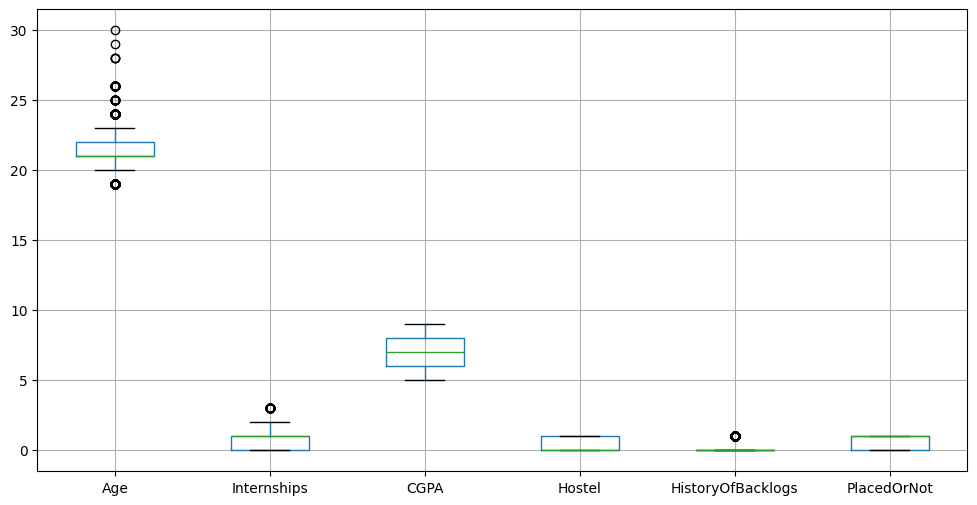

In [ ]:
print(df.isnull().sum())

# Boxplot to detect outliers
df.boxplot(figsize=(12,6))
plt.show()


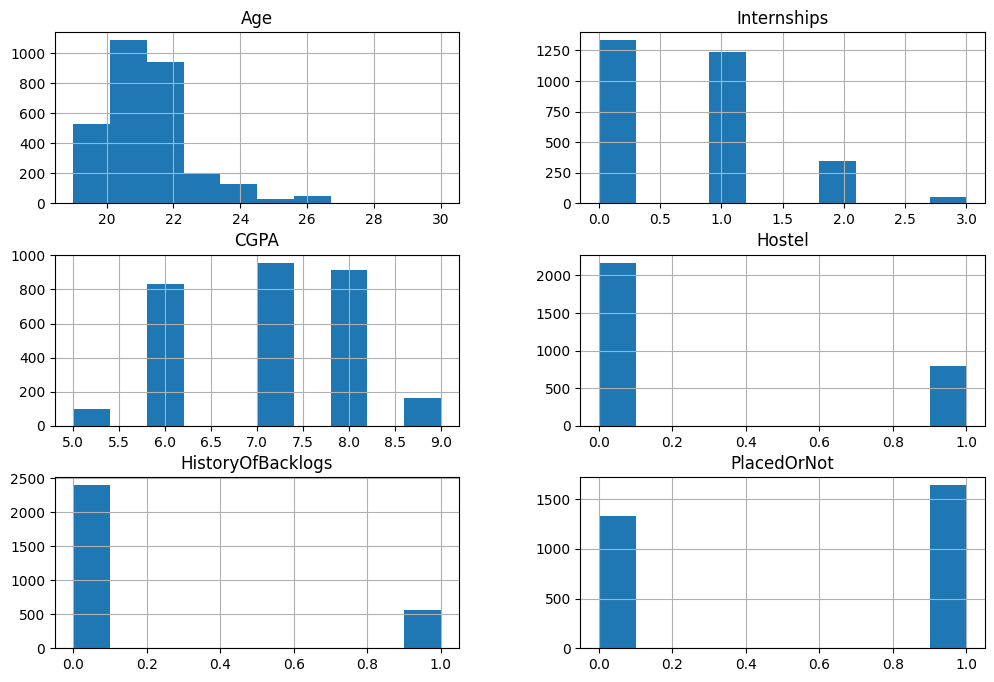

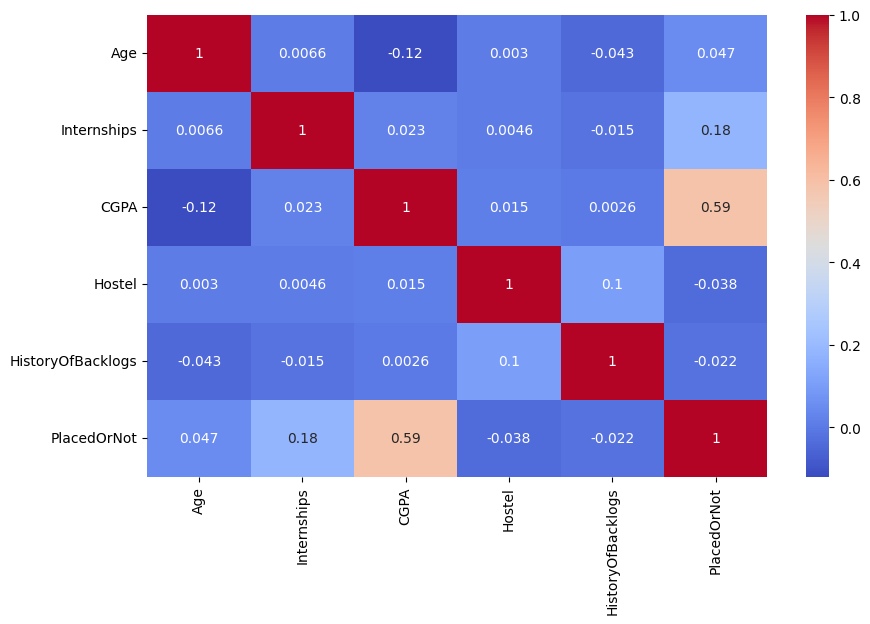

In [ ]:
df.hist(figsize=(12,8))
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop("PlacedOrNot", axis=1)
y = df["PlacedOrNot"]


In [ ]:
from sklearn.linear_model import LinearRegression

X_simple = df[['CGPA']]
y_simple = df['PlacedOrNot']

simple_model = LinearRegression()
simple_model.fit(X_simple, y_simple)
import pandas as pd

simple_model.predict(pd.DataFrame({'CGPA':[8]}))




array([0.83275727])

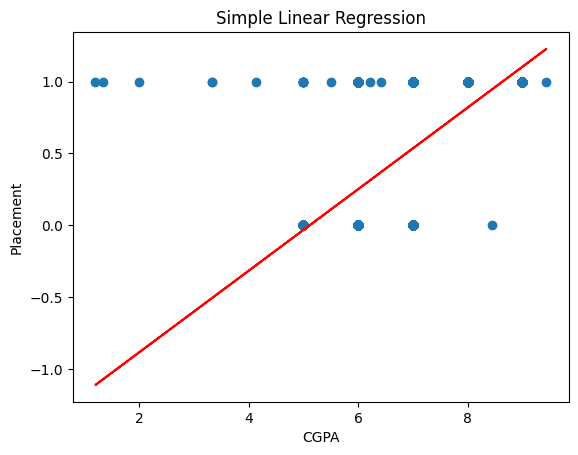

Slope: [0.28381925]
Intercept: -1.452448146053697


In [43]:
plt.scatter(X_simple, y_simple)
plt.plot(X_simple, simple_model.predict(X_simple), color='red')
plt.xlabel("CGPA")
plt.ylabel("Placement")
plt.title("Simple Linear Regression")
plt.show()

print("Slope:", simple_model.coef_)
print("Intercept:", simple_model.intercept_)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)


LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multi_model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)

print("Coefficients:", multi_model.coef_)


MSE: 0.1802608973010936
RMSE: 0.42457142779642343
R2 Score: 0.27658628343802705
Coefficients: [ 0.04301903  0.10158496  0.3011195  -0.01695681 -0.00423913  0.01527089
  0.10486405  0.08924665  0.12530403  0.11460865  0.03030455]


In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
y_poly_pred = poly_model.predict(X_test_poly)

print("Polynomial R2:", r2_score(y_test, y_poly_pred))


Polynomial R2: 0.4261375170409991


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))


Ridge R2: 0.34304849192794906


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))


Lasso R2: 0.3413303119688246


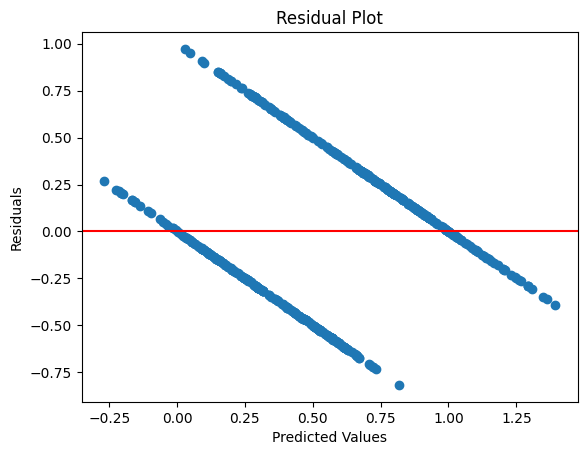

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
